# <center>Instituto Tecnológico de Estudios Superiores de Occidente</center>



<img style="float: center" src="logo-ITESO-png.png" width="350px" height="125px"/>




#### <center>"Simulación Matemática"</center>


### <center>SIMULACIÓN DE UN PORTAFOLIO DE INVERSIÓN</center>

.



**<center>Profesor: Gabriel Alejando Morales Ruiz</center>**

.



**<center>Leonardo Rodríguez Hernández - 741983</center>**



**<center>Valenzuela Lafarga Mariana - 749770</center>**



**<center>Nancy Woolrich Sorroza - 741983</center>**



.


**<center>22 de abril 2024.</center>**

## <center> Construcción de un portafolio de inversión con programación lineal</center>

### Introducción
    
  
    

### Objetivos

#### 1.1 Objetivo general.

Pronosticar un portaforlio de inversión a un año.

#### 1.2 Objetivos específicos
- Calcular la media y desviación estándar de los rendimientos diarios de las acciones de cada empresa para evaluar su distribución y realizar el pronóstico

- Utilizar el método de aproximación de Montecarlo para simular múltiples escenarios de rendimiento del portafolio de inversión en el próximo año.
- Generar visualizaciones claras y concisas de los resultados del proyecto, incluidas gráficas de desempeño del portafolio y distribuciones de rendimientos simulados.


### Modelo del problema.

Para generar el modelo que pronostique los rendimientos a 1 año se utilizarán los datos diarios del 14 de abril de 2022 a 2023 para poder realizar la comparación con el año 2024 y determinar si el modelo planteado es válido, los datos son sacados de Yahoo finance.

Las acciones con las que se trabajará en el portafolio son:

>- **AAPL:** Apple Inc. diseña, fabrica y comercializa teléfonos inteligentes, computadoras personales, tabletas, dispositivos portátiles y accesorios en todo el mundo.Es la empresa de tecnología más grande del mundo.

>- **AZO:** AutoZone, Inc. vende y distribuye repuestos y accesorios automotrices en Estados Unidos, México y Brasil. La empresa ofrece diversos productos para automóviles, vehículos utilitarios deportivos, camionetas y camiones ligeros.


>- **VRTX:** Ertex Pharmaceuticals Incorporated, una empresa de biotecnología, se dedica al desarrollo y comercialización de terapias para el tratamiento de la fibrosis quística (FQ).


>- **OXY:** Occidental Petroleum Corporation, junto con sus subsidiarias, se dedica a la adquisición, exploración y desarrollo de propiedades de petróleo y gas en los Estados Unidos, Medio Oriente y el norte de África.


>- **WMT:** Walmart Inc. se dedica a la operación de ventas al por menor, al por mayor, otras unidades y comercio electrónico en todo el mundo. La empresa opera a través de tres segmentos: Walmart U.S., Walmart International y Sam's Club.

Se decidieron escoger acciones que fueran medianamente estables con volatilidades no tan altas para que el modelo tenga un menor grado de error. 


In [1]:
import pandas as pd
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
yf.pdr_override()

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers,
                   start_date=None,
                   end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = yf.download(
        tickers=tickers,
        start=start_date,
        end=end_date
    )
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
tickers = ["AAPL", "AZO", "VRTX", "OXY", "WMT"]
start_date = "2023-04-21"
end_date= "2024-04-21"
closes = get_adj_closes(
    tickers=tickers,
    start_date=start_date,
    end_date=end_date
)
closes.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AZO,OXY,VRTX,WMT
Date,,,,,
2023-04-21 00:00:00-04:00,164.143845,2681.409912,61.098305,331.089996,49.851219
2023-04-24 00:00:00-04:00,164.452209,2677.120117,61.977207,332.839996,50.189625
2023-04-25 00:00:00-04:00,162.900482,2678.340088,60.565048,331.929993,49.798653
2023-04-26 00:00:00-04:00,162.890533,2644.830078,59.508389,323.299988,49.581810
2023-04-27 00:00:00-04:00,167.515854,2660.729980,59.824398,339.369995,49.736225


.

- **Modelo**

El siguente paso es obtener el rendimiento diario, para ello se va a observar la distribución de los rendimientos y así comprobar que se asemejen a una distribucion normal.

.

In [4]:
ret = closes.pct_change().dropna()
ret.head()

,AAPL,AZO,OXY,VRTX,WMT
Date,,,,,
2023-04-24 00:00:00-04:00,0.001879,-0.001600,0.014385,0.005286,0.006788
2023-04-25 00:00:00-04:00,-0.009436,0.000456,-0.022785,-0.002734,-0.007790
2023-04-26 00:00:00-04:00,-0.000061,-0.012511,-0.017447,-0.025999,-0.004354
2023-04-27 00:00:00-04:00,0.028395,0.006012,0.005310,0.049706,0.003114
2023-04-28 00:00:00-04:00,0.007541,0.000970,0.015682,0.004007,-0.002708


En la siguiente gráfica podemos ver que las distribuciones de los rendimientos se asemejan a una normal

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'AZO'}>],
       [<AxesSubplot:title={'center':'OXY'}>,
        <AxesSubplot:title={'center':'VRTX'}>],
       [<AxesSubplot:title={'center':'WMT'}>, <AxesSubplot:>]],
      dtype=object)

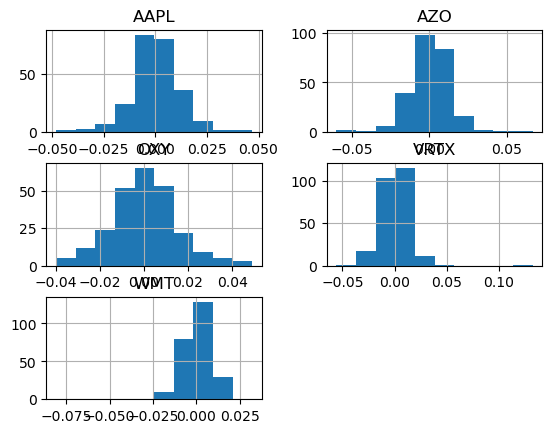

In [5]:
ret.hist()


Ahora se van a obtener los datos de media y desviación estándar para cada uno de estos activos y así tener los parámetros de las distribuciones.

In [6]:
summary_daily = pd.DataFrame({
    "mean": ret.mean(),
    "vol": ret.std()
}).T
summary_daily

,AAPL,AZO,OXY,VRTX,WMT
mean,0.000098,0.000522,0.000455,0.000809,0.000756
vol,0.012408,0.013623,0.014726,0.015014,0.009483


Una vez obtenidos los parámetros de media y desviación de cada uno de los activos se va a realizar la simulación a 1 año con la siguiente función.

In [7]:
def simR(media,std,start,dias,N):
    sim_R= np.random.normal(media, std,size=(dias,N))+1
    fechas= pd.date_range(start,periods=dias)
    return pd.DataFrame(sim_R,index=fechas)

- **Explicación y limitaciones**

El modelo planteado anteriormente pretende obtener el rendimiento pronosticado del portafolio planteado a 1 año, esto se obtiene mediamente las simulaciones de 365 dias según la media y la desviación de cada activo, después se obtiene el precio final y para determinar rendimiento total.

Las limitaciones que presenta este modelo es que los activos pueden no siempre seguir la misma tendencia, y si son activos muy volátiles su media y su desviación estandar cambia drásticamente de un periodo a otro, por lo que puede no ser un modelo tan certero para todo tipo de activos.

### Solución del modelo



Primeramente hacemos una variable para cada desviación estándar y media de cada empresa.

In [8]:
aaplmean = ret["AAPL"].mean()
aaplstd = ret["AAPL"].std()
wmtmean = ret["WMT"].mean()
wmtstd = ret["WMT"].std()
azomean = ret["AZO"].mean()
azostd = ret["AZO"].std()
oxymean = ret["OXY"].mean()
oxystd = ret["OXY"].std()
vrtxmean = ret["VRTX"].mean()
vrtxstd = ret["VRTX"].std()


Simulamos para cada Empresa el rendimiento a 1 año:

**APPLE**

In [9]:
#Simulación del rendimiento a 1 año
sim_R_aapl =simR(aaplmean,aaplstd, "2024-04-22", 365, 1000)
sim_R_aapl

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2024-04-22,0.988905,0.982284,1.007644,1.001074,0.983976,1.014449,1.031782,1.009505,1.014592,1.007429,...,1.002120,1.000889,1.000206,0.994520,1.007334,1.020011,0.995130,0.995582,1.006001,1.002797
2024-04-23,1.040838,0.998479,0.976801,1.008892,0.990277,1.005222,0.985315,0.991532,0.982554,1.025264,...,0.991027,0.991785,1.008784,1.007259,0.991217,1.004039,0.992979,1.003832,0.989518,0.981421
2024-04-24,1.000660,0.989114,0.997488,0.996335,0.991701,1.002620,1.021767,0.997883,0.987478,1.003182,...,0.996797,0.997406,1.006158,1.007609,0.987511,0.998975,1.001615,0.989756,1.008014,0.992642
2024-04-25,1.003435,0.997029,0.993839,1.005160,1.028093,1.000152,1.005211,0.989030,1.006086,1.003504,...,1.009257,1.010729,1.002302,1.009832,1.012773,0.995497,1.001485,0.983355,0.987681,1.006091
2024-04-26,1.015132,0.992567,0.989700,0.986799,0.998511,0.995187,0.994242,1.006147,0.995919,1.020926,...,1.005486,0.998806,1.008421,1.008506,1.002805,1.002128,1.008475,0.987332,0.977584,1.005274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-17,0.992556,0.999867,1.000698,0.983832,0.977303,0.997236,1.025097,0.997604,0.983973,1.012123,...,1.009181,0.990949,0.995517,1.008195,0.995597,0.983395,0.992830,1.002662,0.993842,0.999577
2025-04-18,1.007891,1.012827,1.027676,1.011699,1.001693,1.000407,0.996729,1.027798,0.996780,0.984140,...,1.008595,1.011228,0.994759,0.981578,0.999319,0.995177,1.012002,1.017384,0.996594,0.999652
2025-04-19,1.027227,1.010993,1.010380,0.997921,0.976079,1.002496,0.987813,1.010292,0.982050,1.006867,...,1.007980,1.013153,1.000512,0.994233,1.000119,0.996589,0.982666,0.988525,1.014537,0.990722
2025-04-20,0.984268,1.004535,1.011658,0.991457,0.994665,0.992678,0.994717,0.991625,0.992464,1.008863,...,1.006394,0.972598,0.988441,1.002763,1.001649,1.021228,1.017117,0.991528,1.008544,1.002027


**WALMART**

In [10]:
sim_R_wmt =simR(wmtmean,wmtstd, "2024-04-22", 365, 1000)
sim_R_wmt

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2024-04-22,0.982347,1.022300,0.996743,1.002246,0.996180,1.009530,0.998861,1.013860,0.981665,1.006364,...,1.011908,1.008400,1.001515,1.000419,0.982257,0.991573,1.011176,0.992389,0.983175,0.984607
2024-04-23,0.988971,1.013565,1.020231,0.987614,0.991732,1.007957,1.001523,1.004727,1.028255,0.996731,...,1.000773,1.011908,0.997047,1.002127,0.992152,0.997633,1.003570,0.992475,0.990996,1.014561
2024-04-24,0.997537,1.008213,1.015103,0.996911,0.994567,1.014098,0.997486,1.000543,0.992028,0.997938,...,1.000325,0.984149,0.994903,1.002025,1.008308,0.988818,1.000286,1.003021,0.987797,0.989901
2024-04-25,0.999457,1.016462,0.997803,1.007649,1.006656,1.014582,0.992201,1.011033,1.000115,1.003121,...,0.999988,1.004674,0.999382,1.012514,1.004738,1.006017,1.002629,0.995005,0.987833,0.996794
2024-04-26,0.996636,0.985644,0.982231,1.001908,1.003868,1.014445,1.001090,1.005833,0.995065,1.014642,...,1.007141,0.987207,0.997849,0.996113,0.992716,0.997974,1.007223,0.982794,0.997140,1.014369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-17,0.970525,1.002576,1.010324,1.023119,1.000478,0.994025,0.998849,1.002524,0.999947,1.019707,...,1.017241,1.004431,1.016153,0.997073,1.002345,1.001922,1.008449,0.992843,1.011333,1.018964
2025-04-18,1.007104,0.999528,1.000710,1.006046,1.006250,0.999566,0.994632,0.986190,1.008054,0.997463,...,1.004148,0.992242,0.985768,1.002497,0.987115,1.011643,0.980852,0.994927,0.994242,1.009056
2025-04-19,1.011626,1.008873,0.984176,1.006037,0.999471,1.009442,1.007245,1.013807,0.997777,1.008975,...,1.007405,1.016002,1.009884,1.001149,1.004105,0.998356,0.991426,1.003577,1.000693,0.994440
2025-04-20,1.025734,0.985403,1.017923,1.009174,1.000831,1.010077,1.007439,1.005481,0.982936,0.993958,...,1.016776,1.005977,1.009554,0.994468,1.027478,0.988103,1.016450,0.978628,0.993582,0.985983


**AUTOZONE**

In [11]:
sim_R_azo =simR(azomean,azostd, "2024-04-22", 365, 1000)
sim_R_azo

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2024-04-22,1.027930,1.003617,0.981160,1.008979,1.006473,1.002721,0.996333,0.970135,0.965042,1.004634,...,0.994015,1.017658,0.997466,0.982741,0.985604,1.012772,0.994809,0.986591,1.025961,0.983900
2024-04-23,0.999774,1.020972,1.019081,1.025812,0.996294,0.987914,0.977891,0.976567,1.011074,0.984646,...,1.014533,1.001429,0.998044,0.999136,0.988734,1.003519,1.016634,0.991706,1.016011,1.034310
2024-04-24,1.020653,0.994582,0.994963,1.027074,1.008639,1.012652,0.988182,1.002220,0.978096,1.004357,...,1.000742,1.006916,1.024754,0.963240,1.004782,1.010366,0.992042,1.019097,0.968683,0.991864
2024-04-25,1.010123,1.011235,0.990309,0.997888,1.003720,0.987973,1.002380,1.028275,1.014221,0.991068,...,0.967827,1.016752,1.005830,0.995962,1.003437,0.984319,0.977645,1.011896,0.991345,1.036084
2024-04-26,0.989239,1.016965,0.989762,1.000748,1.012108,0.997942,0.979333,0.980072,0.995503,0.983881,...,0.999438,1.010943,0.994487,1.015343,1.002994,1.005366,1.011600,1.001705,0.996364,0.994314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-17,0.968237,1.012816,1.016274,1.003636,1.007748,0.997978,0.989924,1.003606,1.004683,0.989264,...,0.991990,0.989474,1.006631,0.989069,1.014193,1.018563,1.026632,1.015125,0.992927,0.989277
2025-04-18,1.016994,1.006243,1.005007,1.005910,0.985150,0.986734,1.009183,0.988736,1.008341,1.002533,...,1.017137,1.023045,0.977123,1.006382,1.009712,1.011941,0.988611,1.016475,0.993810,1.000268
2025-04-19,0.960918,1.005190,0.994331,1.008318,0.984289,1.011402,1.001062,0.989345,1.022333,0.985550,...,0.990844,1.003761,0.981457,0.996295,0.982849,0.978254,1.026884,0.984815,1.009754,0.973164
2025-04-20,1.022462,1.014906,0.991935,1.004277,0.998233,1.000430,0.994975,0.988310,1.014582,1.026431,...,0.990292,0.994582,1.000796,0.983169,0.977412,0.976046,0.995057,0.985171,0.982398,1.008201


**ERTEX PHARMACEUTICALS**

In [12]:
sim_R_vrtx =simR(vrtxmean,vrtxstd, "2024-04-22", 365, 1000)
sim_R_vrtx

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2024-04-22,1.014167,1.008657,0.982945,1.006569,0.979753,0.964328,0.996789,0.988529,0.991078,0.987928,...,1.003705,0.992034,0.979714,1.011796,1.010423,0.978795,1.005884,0.991676,1.009450,1.022835
2024-04-23,1.025452,1.010251,0.991135,1.000903,1.003502,0.995171,0.992483,0.999050,0.994888,1.010667,...,1.000280,1.003991,1.002873,0.980611,1.022561,0.968104,0.998132,1.000326,0.990190,1.017425
2024-04-24,0.997241,1.004845,0.979761,0.988577,0.988419,1.028244,0.998842,0.976600,1.019888,0.994480,...,1.007680,0.988327,1.004598,1.011268,0.995448,1.001927,0.975684,1.036662,0.973341,0.984407
2024-04-25,0.977960,1.011691,1.011573,0.976271,0.991891,0.993460,1.022317,0.979190,1.014553,1.025213,...,0.984406,0.990893,0.999324,0.989412,1.003740,0.996138,0.978709,1.004856,1.000951,1.006650
2024-04-26,0.973579,0.975952,0.996695,1.003903,1.013413,0.985360,0.964038,1.012449,0.966615,0.985990,...,0.969585,0.987821,0.984829,1.008366,1.010573,1.005432,0.999415,0.995700,0.989937,1.009626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-17,0.999828,1.020046,1.009889,1.008769,1.012704,1.004920,1.030513,0.994024,0.971873,1.014873,...,0.993010,0.988460,1.003794,1.000957,1.000514,0.997883,0.996986,0.980346,1.034830,0.979660
2025-04-18,0.988124,1.028127,1.004723,1.007053,1.000795,0.979689,1.012141,1.017845,0.996618,1.000126,...,1.015483,0.997426,0.992104,1.013302,1.013723,1.017288,1.006389,0.989921,1.023278,0.991929
2025-04-19,1.004754,1.009445,0.991348,1.017233,0.987929,1.004891,0.976987,0.995901,1.010521,1.036761,...,0.999203,1.002953,1.002942,0.991634,1.008997,1.009903,0.958306,1.005396,1.004384,0.985084
2025-04-20,0.994809,0.961177,0.996600,1.007538,0.989561,1.020708,1.011977,1.007965,0.992539,1.011059,...,0.992221,0.985861,0.994565,1.002274,1.003498,1.000879,1.002130,1.000085,1.018149,0.984846


**OCCIDENTAL PETROLEUM CORPORATION**

In [13]:
sim_R_oxy =simR(oxymean,oxystd, "2024-04-22", 365, 1000)
sim_R_oxy

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2024-04-22,0.989831,1.004608,1.001458,0.996915,1.013182,0.995745,1.006353,1.002469,0.989657,1.002202,...,1.005231,1.001659,0.988144,1.004268,1.008744,1.001756,1.006724,1.022090,0.997625,0.986598
2024-04-23,1.006059,0.977116,0.988071,1.049190,1.001754,0.988410,0.992983,1.017418,0.999983,1.015390,...,0.998075,0.998094,1.004944,1.005226,1.009256,1.010175,1.001812,0.995820,1.014847,1.018506
2024-04-24,1.006816,0.989598,1.011528,0.995439,1.006368,0.996427,0.996956,1.012018,1.002584,0.997167,...,0.991153,1.004885,1.002825,1.011958,1.019733,1.014436,1.022778,0.999402,0.993277,1.002362
2024-04-25,0.971123,1.000290,0.993007,1.035274,0.984548,1.014827,1.006085,0.985824,0.991571,0.999015,...,1.032817,0.994305,0.974353,1.021953,0.998102,0.991857,0.986488,1.005064,1.001912,0.993042
2024-04-26,1.009199,0.985473,0.981907,0.982734,0.979769,0.979478,1.010923,1.002432,0.993943,1.017951,...,1.011942,0.993530,0.984527,0.993845,0.970204,1.009953,1.017948,1.012370,1.005302,1.008105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-17,0.997752,0.987524,1.026337,0.981612,1.002829,0.977919,0.985729,1.016468,1.001998,1.000926,...,1.013655,1.017214,1.031485,0.990480,0.993839,0.986137,0.979059,1.014609,1.002787,0.983467
2025-04-18,0.989092,1.008492,1.005875,0.998358,0.991150,1.015783,1.025439,1.001702,1.020207,0.988617,...,1.001515,1.008163,0.988877,0.981992,1.032302,0.977771,0.964527,1.013307,1.006167,1.002518
2025-04-19,1.005122,1.007007,1.012382,0.980791,1.018341,1.024079,1.012810,1.000644,1.001449,1.000555,...,1.006416,1.009350,1.018184,0.990712,0.993092,0.969941,1.018064,1.002490,0.968007,1.032053
2025-04-20,1.006994,1.002060,1.005962,1.026883,1.015398,1.000287,1.001237,0.989463,1.013817,0.982517,...,1.027788,1.028075,0.997209,0.968035,1.021851,0.997318,0.990853,0.995260,1.005052,1.024937


In [14]:
closes.iloc[-1]

AAPL     165.000000
AZO     2985.540039
OXY       66.629997
VRTX     394.279999
WMT       59.529999
Name: 2024-04-19 00:00:00-04:00, dtype: float64

**Precios de cierre promedio**

Apple


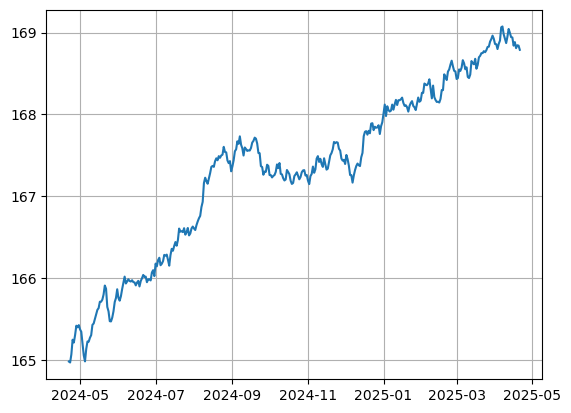

In [15]:
print("Apple")
precios_cierre_aapl=sim_R_aapl.cumprod()*165.000000
mean_aapl = precios_cierre_aapl.mean(axis=1)
plt.plot(mean_aapl)
plt.grid()


Walmart


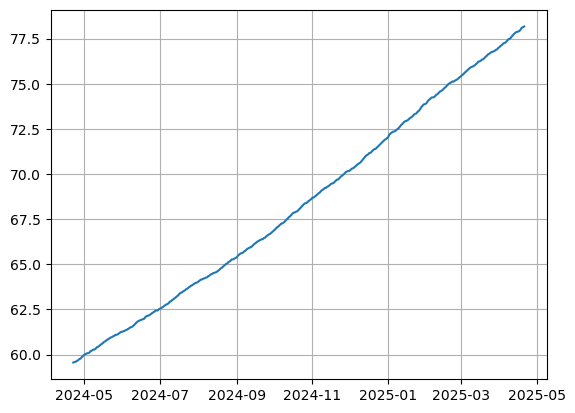

In [16]:
print("Walmart")
precios_cierre_wmt=sim_R_wmt.cumprod()* 59.529999
mean_wmt = precios_cierre_wmt.mean(axis=1)
plt.plot(mean_wmt)
plt.grid()



AutoZone


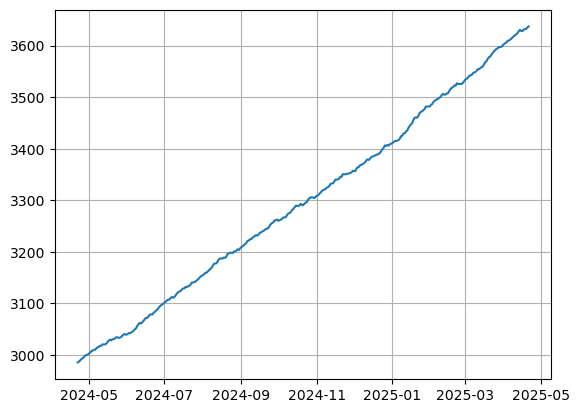

In [17]:
print("AutoZone")
precios_cierre_azo=sim_R_azo.cumprod()*2985.540039
mean_azo = precios_cierre_azo.mean(axis=1)
plt.plot(mean_azo)
plt.grid()

Occidental Petroleum


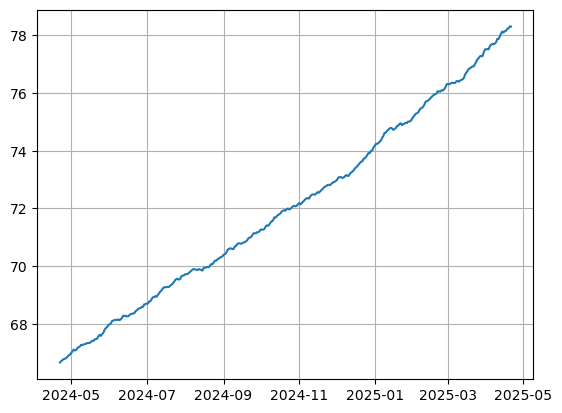

In [18]:
print("Occidental Petroleum")
precios_cierre_oxy=sim_R_oxy.cumprod()*66.629997
mean_oxy = precios_cierre_oxy.mean(axis=1)
plt.plot(mean_oxy)
plt.grid()

Vertex Pharmaceutics


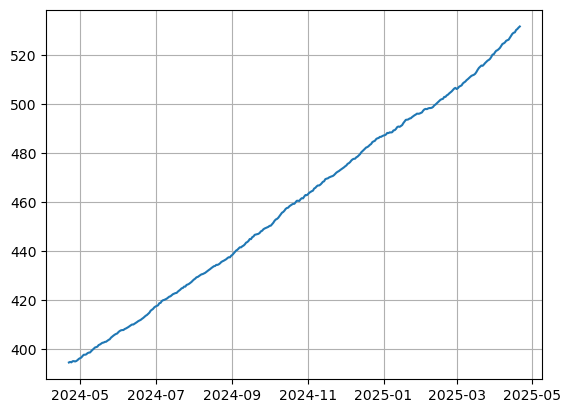

In [19]:
print("Vertex Pharmaceutics")
precios_cierre_vrtx=sim_R_vrtx.cumprod()*394.279999
mean_vrtx = precios_cierre_vrtx.mean(axis=1)
plt.plot(mean_vrtx)
plt.grid()

**PROBABILIDAD DE AUMENTO DEL 20% EN EL SIGUIENTE AÑO**

In [20]:
# Probabilidad que el dinero crezca un 20%

prob_aapl = ((sim_R_aapl.cumprod()*165.000000 > 165.000000*1.20).mean(axis=1)).mean()*100
prob_wmt = ((sim_R_wmt.cumprod()*59.529999 > 59.529999*1.20).mean(axis=1)).mean()*100
prob_oxy = ((sim_R_oxy.cumprod()*66.629997 > 66.629997*1.20).mean(axis=1)).mean()*100
prob_azo = ((sim_R_azo.cumprod()*2985.540039 > 2985.540039*1.20).mean(axis=1)).mean()*100
prob_vrtx = ((sim_R_vrtx.cumprod()*394.279999 >394.279999*1.20).mean(axis=1)).mean()*100

print("APPLE:",prob_aapl,"%")
print("WALMART:",prob_wmt,"%")
print("AUTOZONE:",prob_azo,"%")
print("OCCIDENTAL PETROLEUM:",prob_oxy,"%")
print("VERTEX PHARMACEUTICS:",prob_vrtx,"%")


APPLE: 12.054520547945199 %
WALMART: 31.992876712328766 %
AUTOZONE: 26.546027397260268 %
OCCIDENTAL PETROLEUM: 23.755342465753444 %
VERTEX PHARMACEUTICS: 35.460821917808225 %


## Comparación con el año anterior (2023)

Para observar si nuestro modelo se acerca a la realidad vamos a comparar las simulaciones del año pasado con los precios reales para observar si se asemeja a la realidad

In [21]:
tickers = ["AAPL", "AZO", "VRTX", "OXY", "WMT"]
start_date = "2022-04-21"
end_date= "2023-04-21"
closes = get_adj_closes(
    tickers=tickers,
    start_date=start_date,
    end_date=end_date
)
closes.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AZO,OXY,VRTX,WMT
Date,,,,,
2022-04-21 00:00:00-04:00,164.539673,2233.310059,57.946964,281.709991,51.700851
2022-04-22 00:00:00-04:00,159.962006,2160.270020,55.421570,270.420013,50.727432
2022-04-25 00:00:00-04:00,161.039703,2195.679932,53.757553,271.679993,50.753307
2022-04-26 00:00:00-04:00,155.028381,2195.939941,53.659676,267.690002,50.222939
2022-04-27 00:00:00-04:00,154.800980,2181.340088,54.413372,267.250000,49.880150


In [22]:
ret = closes.pct_change().dropna()
ret.head()

,AAPL,AZO,OXY,VRTX,WMT
Date,,,,,
2022-04-22 00:00:00-04:00,-0.027821,-0.032705,-0.043581,-0.040077,-0.018828
2022-04-25 00:00:00-04:00,0.006737,0.016391,-0.030025,0.004659,0.000510
2022-04-26 00:00:00-04:00,-0.037328,0.000118,-0.001821,-0.014686,-0.010450
2022-04-27 00:00:00-04:00,-0.001467,-0.006649,0.014046,-0.001644,-0.006825
2022-04-28 00:00:00-04:00,0.045156,-0.076513,0.025904,0.005201,0.012772


In [23]:
aaplmean = ret["AAPL"].mean()
aaplstd = ret["AAPL"].std()
wmtmean = ret["WMT"].mean()
wmtstd = ret["WMT"].std()
azomean = ret["AZO"].mean()
azostd = ret["AZO"].std()
oxymean = ret["OXY"].mean()
oxystd = ret["OXY"].std()
vrtxmean = ret["VRTX"].mean()
vrtxstd = ret["VRTX"].std()


In [24]:
sim_R_aapl23 =simR(aaplmean,aaplstd, "2023-04-22", 365, 1000)
sim_R_wmt23 =simR(wmtmean,wmtstd, "2023-04-22", 365, 1000)
sim_R_azo23 =simR(azomean,azostd, "2023-04-22", 365, 1000)
sim_R_vrtx23=simR(vrtxmean,vrtxstd, "2023-04-22", 365, 1000)
sim_R_oxy23 =simR(oxymean,oxystd, "2023-04-22", 365, 1000)

In [25]:
closes.iloc[-1]

AAPL     165.765182
AZO     2701.840088
OXY       61.256313
VRTX     329.149994
WMT       49.601524
Name: 2023-04-20 00:00:00-04:00, dtype: float64

Apple


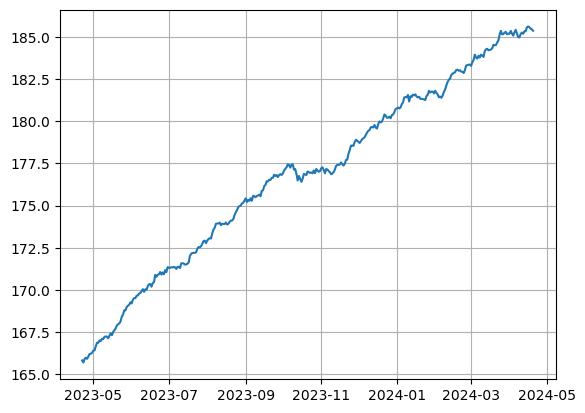

In [26]:
print("Apple")
precios_cierre_aapl=sim_R_aapl23.cumprod()*165.765182
mean_aapl = precios_cierre_aapl.mean(axis=1)
plt.plot(mean_aapl)
plt.grid()

Walmart


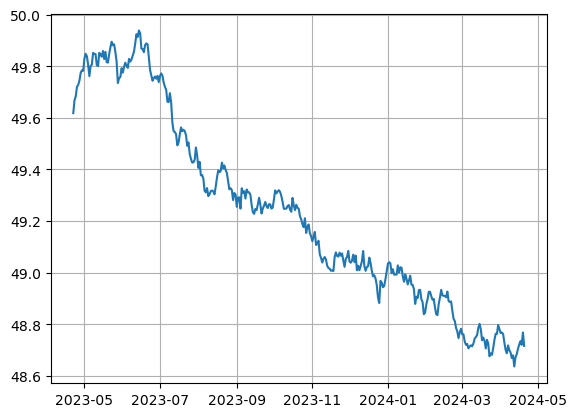

In [27]:
print("Walmart")
precios_cierre_wmt=sim_R_wmt23.cumprod()* 49.601521
mean_wmt = precios_cierre_wmt.mean(axis=1)
plt.plot(mean_wmt)
plt.grid()

AutoZone


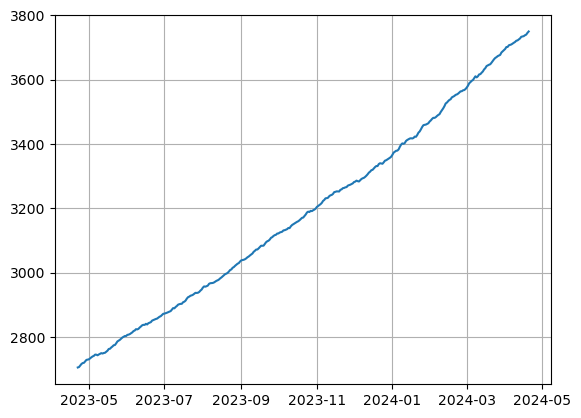

In [28]:
print("AutoZone")
precios_cierre_azo=sim_R_azo23.cumprod()*2701.840088
mean_azo = precios_cierre_azo.mean(axis=1)
plt.plot(mean_azo)
plt.grid()

Occidental Petroleum


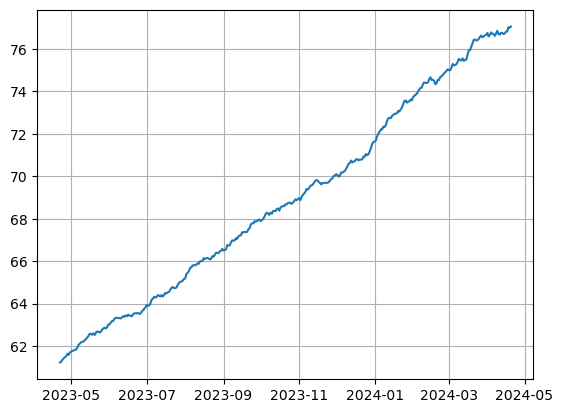

In [29]:
print("Occidental Petroleum")
precios_cierre_oxy=sim_R_oxy23.cumprod()*   61.256317
mean_oxy = precios_cierre_oxy.mean(axis=1)
plt.plot(mean_oxy)
plt.grid()

Vertex Pharmaceutics


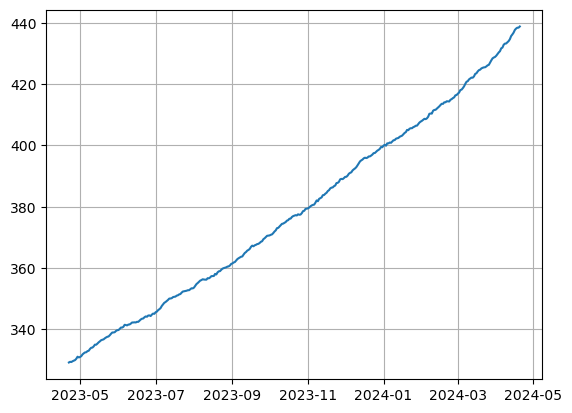

In [30]:
print("Vertex Pharmaceutics")
precios_cierre_vrtx=sim_R_vrtx23.cumprod()*329.149994
mean_vrtx = precios_cierre_vrtx.mean(axis=1)
plt.plot(mean_vrtx)
plt.grid()

In [31]:
def getClose(names, start, end):
    return yf.download(names, start=start, end=end)[["Adj Close"]]

In [32]:
aapl=getClose("AAPL", "2023-04-22", "2024-04-22")
wmt=getClose("WMT", "2023-04-22", "2024-04-22")
azo=getClose("AZO", "2023-04-22", "2024-04-22")
oxy=getClose("OXY", "2023-04-22", "2024-04-22")
vrtx=getClose("VRTX", "2023-04-22", "2024-04-22")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Apple


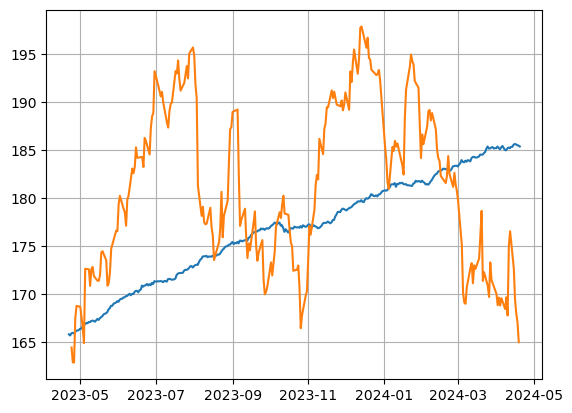

In [33]:
print("Apple")
plt.plot(mean_aapl)
plt.plot(aapl)
plt.grid()

Walmart


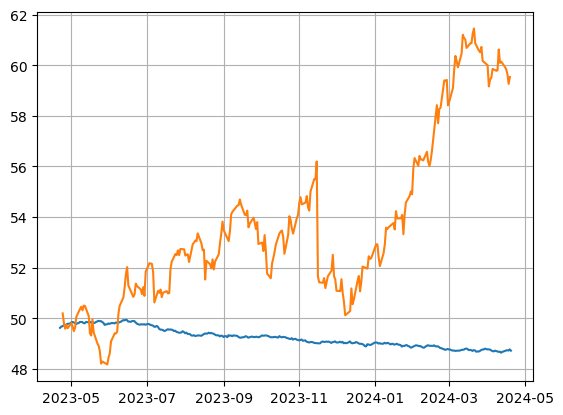

In [34]:
print("Walmart")
plt.plot(mean_wmt)
plt.plot(wmt)
plt.grid()

AutoZone


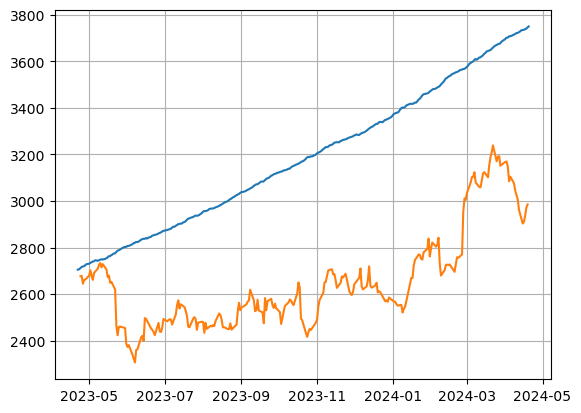

In [35]:
print("AutoZone")
plt.plot(mean_azo)
plt.plot(azo)
plt.grid()

Occidental Petroleum


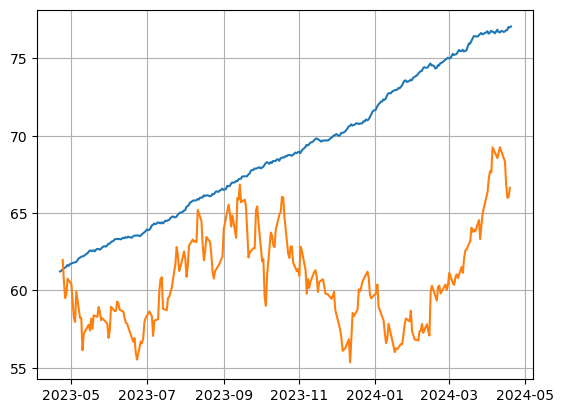

In [36]:
print("Occidental Petroleum")
plt.plot(mean_oxy)
plt.plot(oxy)
plt.grid()

Vertex Pharmaceutics


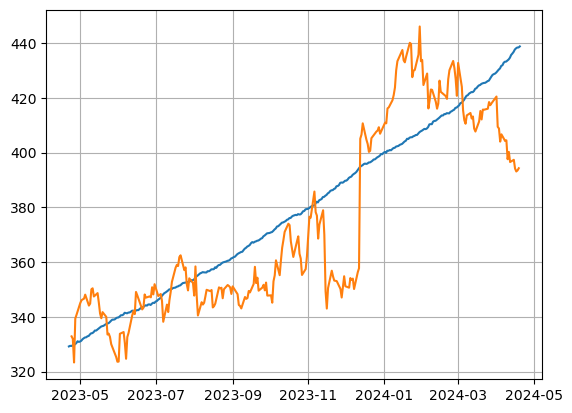

In [37]:
print("Vertex Pharmaceutics")
plt.plot(mean_vrtx)
plt.plot(vrtx)
plt.grid()

## Pronostico de rendimiento del portafolio

Con el pronostico de cual será el precio al final del periodo y tomando en cuenta que invertiremos el 20% del capital en cada acción podemos obtener el rendimiento final esperado del portafolio 

In [38]:
precios_cierre_aapl=sim_R_aapl.cumprod()*165.000000
mean_aapl = precios_cierre_aapl.mean(axis=1)
mean_aapl

2024-04-22    164.979933
2024-04-23    164.968836
2024-04-24    165.068911
2024-04-25    165.247172
2024-04-26    165.212497
                 ...    
2025-04-17    168.883737
2025-04-18    168.809851
2025-04-19    168.845238
2025-04-20    168.840507
2025-04-21    168.789292
Freq: D, Length: 365, dtype: float64

In [39]:
precios_cierre_wmt=sim_R_wmt.cumprod()* 59.529999
mean_wmt = precios_cierre_wmt.mean(axis=1)
mean_wmt

2024-04-22    59.562635
2024-04-23    59.591211
2024-04-24    59.604143
2024-04-25    59.652106
2024-04-26    59.693272
                ...    
2025-04-17    77.919079
2025-04-18    77.989515
2025-04-19    78.098746
2025-04-20    78.137707
2025-04-21    78.175373
Freq: D, Length: 365, dtype: float64

In [40]:
precios_cierre_oxy=sim_R_oxy.cumprod()*66.629997
mean_oxy = precios_cierre_oxy.mean(axis=1)
mean_oxy

2024-04-22    66.657302
2024-04-23    66.707627
2024-04-24    66.744479
2024-04-25    66.773688
2024-04-26    66.787376
                ...    
2025-04-17    78.156664
2025-04-18    78.228106
2025-04-19    78.241861
2025-04-20    78.308965
2025-04-21    78.305446
Freq: D, Length: 365, dtype: float64

In [41]:
precios_cierre_vrtx=sim_R_vrtx.cumprod()*394.279999
mean_vrtx = precios_cierre_vrtx.mean(axis=1)
mean_vrtx

2024-04-22    394.535947
2024-04-23    394.766919
2024-04-24    394.588470
2024-04-25    395.043177
2024-04-26    395.092109
                 ...    
2025-04-17    529.313950
2025-04-18    530.275310
2025-04-19    530.675347
2025-04-20    531.261938
2025-04-21    531.723917
Freq: D, Length: 365, dtype: float64

In [42]:
precios_cierre_azo=sim_R_azo.cumprod()*2985.540039
mean_azo = precios_cierre_azo.mean(axis=1)
mean_azo

2024-04-22    2985.462900
2024-04-23    2987.133500
2024-04-24    2989.655591
2024-04-25    2992.206328
2024-04-26    2993.754935
                 ...     
2025-04-17    3631.183395
2025-04-18    3631.744653
2025-04-19    3632.118015
2025-04-20    3635.409071
2025-04-21    3636.942866
Freq: D, Length: 365, dtype: float64

In [51]:
ret_aapl=168.789292/164.979933-1
ret_aapl*100

2.308983238585749

In [50]:
ret_wmt= 78.175373/ 59.562635-1
ret_wmt*100

31.24901710611021

In [52]:
ret_oxy= 78.305446/66.657302-1
ret_oxy*100

17.4746706669886

In [53]:
ret_vrtx=531.723917/394.535947-1
ret_vrtx*100


34.77198238668986

In [54]:
ret_azo=3636.942866/2985.462900-1
ret_azo*100

21.821740474483864

In [48]:
rend_total=(ret_aapl+ret_wmt+ret_oxy+ret_vrtx+ret_azo)/5
rend_total*100

21.525278774571657

### Conclusiones.



### Referencias.

